# Citi Bike Data

## Question: 
Is the average trip time for citibike affected by the gender of the person?

## Defining significance
p = .05

## Null hypothesis:

Using the 2017 July Citibike dataset, the average trip time taken by female is the same as the time taken by men.

M = average trip time for male riders in July 2017 <br />
F = average trip time for gender riders in July 2017

$H_0$: F = M


## Alternative hypothesis
The average triptime of a citibike trip during July 2017 is significantly (at a 95% confidence level) different depending on the user's gender(two tail test).

M = average trip time for male riders in July 2017 <br />
F = average trip time for gender riders in July 2017

$H_1$: $F \neq M$

**Feedback incorporated above from peer reviewers: significance level added**

## Describing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip")

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [4]:
df1 = df[["tripduration", "gender"]]
df1.head()

,tripduration,gender
0,364,1
1,2142,1
2,328,2
3,2530,1
4,2534,2


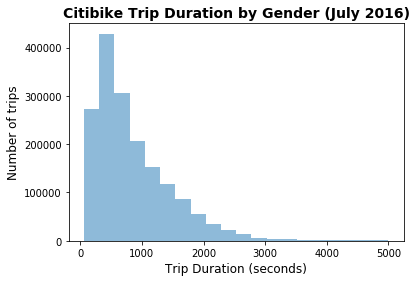

In [43]:
hist(df2.tripduration, bins = 20, label = "Male", alpha=0.5)


plt.xlabel("Trip Duration (seconds)", fontsize=12)
plt.ylabel("Number of trips", fontsize=12)
plt.title("Citibike Trip Duration (July 2016)", weight='bold', fontsize=14)


**Fig 1:** This shows the distribution of trip duration for all citibike rides in July of 2016, after outliers have been removed. We notice in this distribution that the average trip duration appears to be less than 900 seconds. This is for all riders, regardless of gender. 


In [44]:
df2.tripduration.mean()

860.16389910523935

In [5]:
# getting rid of outliers
df2 = df1[df1["tripduration"]<5000]
df2.head()

,tripduration,gender
0,364,1
1,2142,1
2,328,2
3,2530,1
4,2534,2


In [6]:
df2['gender'].replace(0, 'Unknown',inplace=True)
df2['gender'].replace(1, 'Male',inplace=True)
df2['gender'].replace(2, 'Female',inplace=True)
df2.tail()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:3443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,tripduration,gender
1735594,560,Female
1735595,272,Male
1735596,1211,Female
1735597,547,Male
1735598,1816,Unknown


In [7]:
dfF = df2[df2['gender']=='Female']
dfM = df2[df2['gender']=='Male']
dfU = df2[df2['gender']=='Unknown']

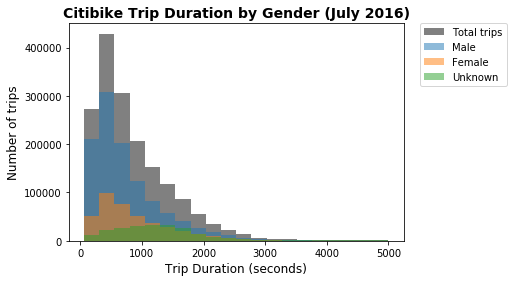

In [8]:
hist(df2.tripduration, bins = 20, color = "Grey", label = "Total trips")
hist(dfM.tripduration, bins = 20, label = "Male", alpha=0.5)
hist(dfF.tripduration, bins = 20, label = "Female", alpha=0.5)
hist(dfU.tripduration, bins = 20, label = "Unknown", alpha=0.5)

plt.xlabel("Trip Duration (seconds)", fontsize=12)
plt.ylabel("Number of trips", fontsize=12)
plt.title("Citibike Trip Duration by Gender (July 2016)", weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


**Fig 2:** The figure shows the distribution of trip durations by the number of trips for July 2016 Citibike data. In gray we see the total numbers. In blue, we see the distribution of male riders. In orange, we see the distribution of female riders. While it appears that the number of trips is much less for females than for males, the shape of the distributions themselves look similar. In order to understand if their distributions are significantly different, we'll have to do testing.

In [9]:
dfM.describe()

,tripduration
count,1.095725e+06
mean,7.585743e+02
std,5.717199e+02
min,6.100000e+01
25%,3.550000e+02
50%,5.840000e+02
75%,9.960000e+02
max,4.999000e+03


In [10]:
dfF.describe()

,tripduration
count,399225.000000
mean,875.134360
std,617.219874
min,61.000000
25%,424.000000
50%,701.000000
75%,1171.000000
max,4997.000000


___

### Testing for significance  (HW7)
**KS TEST**

In [59]:
# for reproducability
np.random.seed(14)

In [60]:
# how big is the smaller distribution?
size(dfF)

798450

In [61]:
# creating sample of Male rider distribution that's the same length as female distribution for comparison
Msample = np.random.choice(dfM.tripduration, size=798450, replace=False)

In [62]:
# comparing the two samples of the same size to see if from the same parent distribution
import scipy.stats
scipy.stats.ks_2samp(dfF.tripduration, Msample)

Ks_2sampResult(statistic=0.0941398960482932, pvalue=0.0)

#### Interpretation
H0 - There is no statistical difference for trip duration for female and male riders. They come from the same distribution </br>

We reject the null, because the p value is zero. 